# Importing Libraries

In [ ]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 80.0 MB/s eta 0:00:00


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc, html
import plotly.express as px
import json
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

# Reading the data

In [ ]:
#read the data
customers = pd.read_csv('/content/olist_customers_dataset.csv')
geolocation = pd.read_csv('/content/olist_geolocation_dataset.csv')
order_item = pd.read_csv('/content/olist_order_items_dataset.csv')
payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/olist_orders_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
product_category = pd.read_csv('/content/product_category_name_translation.csv')
product_category_english = pd.read_csv('/content/product_category_name_translation.csv')

# Data Overview

In [ ]:
# List of DataFrames
dfs = [customers, geolocation, order_item, payments, order_reviews, orders, products, sellers, product_category, product_category_english]

# Optional: names for clarity
df_names = ['customers', 'geolocation', 'order_item', 'payments', 'order_reviews', 'orders', 'products', 'sellers', 'product_category', 'product_category_english']

# Print the shape of each DataFrame
for name, df in zip(df_names, dfs):
    print(f"{name}: {df.shape}")

customers: (99441, 5)
geolocation: (1000163, 5)
order_item: (112650, 7)
payments: (103886, 5)
order_reviews: (99224, 7)
orders: (99441, 8)
products: (32951, 9)
sellers: (3095, 4)
product_category: (71, 2)
product_category_english: (71, 2)


# Data Cleaning & Preparation

## Customers

### Checking the data types of the columns for the table

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Statistical summary of the table

In [ ]:
# Get the statistical summary of the data - numerical variables
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0


In [ ]:
# Get the statistical summary of the data - categorical variables
customers.describe(include = 'O').T

,count,unique,top,freq
customer_id,99441,99441,274fa6071e5e17fe303b9748641082c8,1
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17
customer_city,99441,4119,sao paulo,15540
customer_state,99441,27,SP,41746


### Checking for duplicate values


In [ ]:
#checking for duplicate values
customers[customers.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


### Checking for null values

In [ ]:
#checking for null values
customers.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


### Checking for empty values

In [ ]:
#checking for empty cells
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


## Geolocation

### Checking the data types of the columns for the table

In [ ]:
#information of table
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### Statistical summary of the table

In [ ]:
# Get the statistical summary of the data - numerical variables
geolocation.describe().T

,count,mean,std,min,25%,50%,75%,max
geolocation_zip_code_prefix,1000163.0,36574.166466,30549.335710,1001.000000,11075.000000,26530.000000,63504.000000,99990.000000
geolocation_lat,1000163.0,-21.176153,5.715866,-36.605374,-23.603546,-22.919377,-19.979620,45.065933
geolocation_lng,1000163.0,-46.390541,4.269748,-101.466766,-48.573172,-46.637879,-43.767709,121.105394


In [ ]:
# Get the statistical summary of the data - categorical variables
geolocation.describe(include = 'O').T

,count,unique,top,freq
geolocation_city,1000163,8011,sao paulo,135800
geolocation_state,1000163,27,SP,404268


### Checking for duplicate values

In [ ]:
geolocation[geolocation.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


### Checking for null values in table

In [ ]:
#check for null
geolocation.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


### Checking for empty cells in table

In [ ]:
#check for empty cells
geolocation.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


## Order Item

### Checking the data types of the columns for the table

In [ ]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Statistical summary of the table

In [ ]:
#Statistical summary of the table - numerical columns
order_item.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


In [ ]:
#Statistical summary of the table - categorical variables
order_item.describe(include= 'O').T

,count,unique,top,freq
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21


### Checking for duplicate values

In [ ]:
order_item[order_item.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


### Checking if null values exsits in table

In [ ]:
order_item.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


### Checking if empty cells exists in table

In [ ]:
order_item.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


## Payments

### Checking the data types of the columns for the table

In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Statistical summary of the table

In [ ]:
payments.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


In [ ]:
payments.describe(include= 'O').T

,count,unique,top,freq
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29
payment_type,103886,5,credit_card,76795


### Checking for duplicates values

In [ ]:
payments[payments.duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


### Checking if the null values exists in data

In [ ]:
payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


### Checking if the empty cells exists in data

In [ ]:
payments.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


## Order Reviews

### Checking the data types of the columns for the table

In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### Statistical Summary of the table

In [ ]:
order_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
review_score,99224.0,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0


In [ ]:
order_reviews.describe(include='O').T

,count,unique,top,freq
review_id,99224,98410,4548534449b1f572e357211b90724f1b,3
order_id,99224,98673,03c939fd7fd3b38f8485a0f95798f1f6,3
review_comment_title,11568,4527,Recomendo,423
review_comment_message,40977,36159,Muito bom,230
review_creation_date,99224,636,2017-12-19 00:00:00,463
review_answer_timestamp,99224,98248,2017-06-15 23:21:05,4


### Checking if the duplicate values exists

In [ ]:
order_reviews[order_reviews.duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


### Checking is the null vales exists in the table

In [ ]:
order_reviews.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


### Checking if the empty cells exists in table

In [ ]:
order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


## Orders

### Checking the data types of the columns for the table

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Convert to datetime type if not already
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [ ]:
orders['purchase_date'] = orders['order_purchase_timestamp'].dt.date       # Just the date

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   purchase_date                  99441 non-null  object        
dtypes: datetime64[ns](5), object(4)
memory usage: 6.8+ MB


### Statistical Summary of the table

In [ ]:
orders.describe().T

,count,mean,min,25%,50%,75%,max
order_purchase_timestamp,99441,2017-12-31 08:43:12.776581120,2016-09-04 21:15:19,2017-09-12 14:46:19,2018-01-18 23:04:36,2018-05-04 15:42:16,2018-10-17 17:30:18
order_approved_at,99281,2017-12-31 18:35:24.098800128,2016-09-15 12:16:38,2017-09-12 23:24:16,2018-01-19 11:36:13,2018-05-04 20:35:10,2018-09-03 17:40:06
order_delivered_carrier_date,97658,2018-01-04 21:49:48.138278656,2016-10-08 10:34:01,2017-09-15 22:28:50.249999872,2018-01-24 16:10:58,2018-05-08 13:37:45,2018-09-11 19:48:28
order_delivered_customer_date,96476,2018-01-14 12:09:19.035542272,2016-10-11 13:46:32,2017-09-25 22:07:22.249999872,2018-02-02 19:28:10.500000,2018-05-15 22:48:52.249999872,2018-10-17 13:22:46
order_estimated_delivery_date,99441,2018-01-24 03:08:37.730111232,2016-09-30 00:00:00,2017-10-03 00:00:00,2018-02-15 00:00:00,2018-05-25 00:00:00,2018-11-12 00:00:00


In [ ]:
orders.describe(include='O').T

,count,unique,top,freq
order_id,99441,99441,66dea50a8b16d9b4dee7af250b4be1a5,1
customer_id,99441,99441,edb027a75a1449115f6b43211ae02a24,1
order_status,99441,8,delivered,96478
purchase_date,99441,634,2017-11-24,1176


### Checking if the duplicate values exists

In [ ]:
orders[orders.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date


### Checking if the null values exists in the table

In [ ]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0
purchase_date,0


### Checking if the empty values exists in the table

In [ ]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0
purchase_date,0


## Products

### Checking the data types of the columns for the table

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### Statistical summary of the table

In [ ]:
products.describe().T

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


In [ ]:
products.describe(include='O').T

,count,unique,top,freq
product_id,32951,32951,106392145fca363410d287a815be6de4,1
product_category_name,32341,73,cama_mesa_banho,3029


### Checking if the duplicate values exists in the table

In [ ]:
products[products.duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


### Checking is the null values exists in the table

In [ ]:
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products.drop('product_name_lenght', axis=1, inplace=True)
products.drop('product_description_lenght', axis=1, inplace=True)
products.drop('product_photos_qty', axis=1, inplace=True)

In [ ]:
products.columns

Index(['product_id', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

### Checking is the empty values exists in the table

In [ ]:
products.isna().sum()

,0
product_id,0
product_category_name,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


## Sellers

### Checking the data types of the columns of the table

In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Statistical summary of the table

In [ ]:
sellers.describe(include='O').T

,count,unique,top,freq
seller_id,3095,3095,9e25199f6ef7e7c347120ff175652c3b,1
seller_city,3095,611,sao paulo,694
seller_state,3095,23,SP,1849


### Checking if the duplicate values exists in the table

In [ ]:
sellers[sellers.duplicated()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state


### Checking if the null values exists in the table

In [ ]:
sellers.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


### Checking if the empty values exists in the table

In [ ]:
sellers.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


## Product_category

### Checking the data type of the columns of the table

In [ ]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Checking if the duplicate values exists in the table

In [ ]:
product_category[product_category.duplicated()]

,product_category_name,product_category_name_english


### Checking if the null values exists in the table

In [ ]:
product_category.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


### Checking if the empty values exists in the table

In [ ]:
product_category.isna().sum()

,0
product_category_name,0
product_category_name_english,0


## Product_Category in English

### Checking the data type of the table

In [ ]:
product_category_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Checking if the duplicate values exists in the table

In [ ]:
product_category_english[product_category_english.duplicated()]

,product_category_name,product_category_name_english


### Checking if the null values exists in the table

In [ ]:
product_category_english.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


### Checking if the empty values exists in the table

In [ ]:
product_category_english.isna().sum()

,0
product_category_name,0
product_category_name_english,0


## Merging the tables

In [ ]:
# Merge orders with order_items
df = pd.merge(orders, order_item, on='order_id', how='inner')

# Merge with products
df = pd.merge(df, products, on='product_id', how='left')

# Merge with sellers
df = pd.merge(df, sellers, on='seller_id', how='left')

# Merge with customers
df = pd.merge(df, customers, on='customer_id', how='left')

# Merge with category translation
df = pd.merge(df, product_category_english, on='product_category_name', how='left')


In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,order_item_id,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02,1,...,8.0,13.0,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24,1,...,13.0,19.0,31570,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08,1,...,19.0,21.0,14840,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,1,...,10.0,20.0,31842,belo horizonte,MG,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13,1,...,15.0,15.0,8752,mogi das cruzes,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,stationery


#  Exploratory Data Analysis (EDA)

## Feature Engineering for Supply Chain KPIs

In [ ]:
# Delivery performance metrics
df['actual_delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['estimated_delivery_time'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
df['delay_vs_estimate'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# Delay flag
df['delayed'] = df['delay_vs_estimate'].apply(lambda x: 1 if x > 0 else 0)

# Price-related metrics
df['total_cost'] = df['price'] + df['freight_value']


###Descriptive Analytics for Supply Chain

In [ ]:
# 1. What % of orders are delayed?
delay_rate = df['delayed'].mean() * 100

# 2. Avg delivery time per state or seller
avg_delivery_state = df.groupby('customer_state')['actual_delivery_time'].mean().sort_values()

# 3. Sellers with highest delays
seller_delays = df.groupby('seller_id')['delayed'].mean().sort_values(ascending=False).head(10)

# 4. Product categories with most delay
category_delay = df.groupby('product_category_name_english')['delayed'].mean().sort_values(ascending=False).head(10)

# 5. Correlation between delivery time & review score (if you merge order_reviews later)
# Optional


# Visual Analytics Dashboard

### Barplot: Top 10 states with most average delays

/tmp/ipython-input-71-2531304148.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delay_by_state.values, y=avg_delay_by_state.index, palette="viridis")


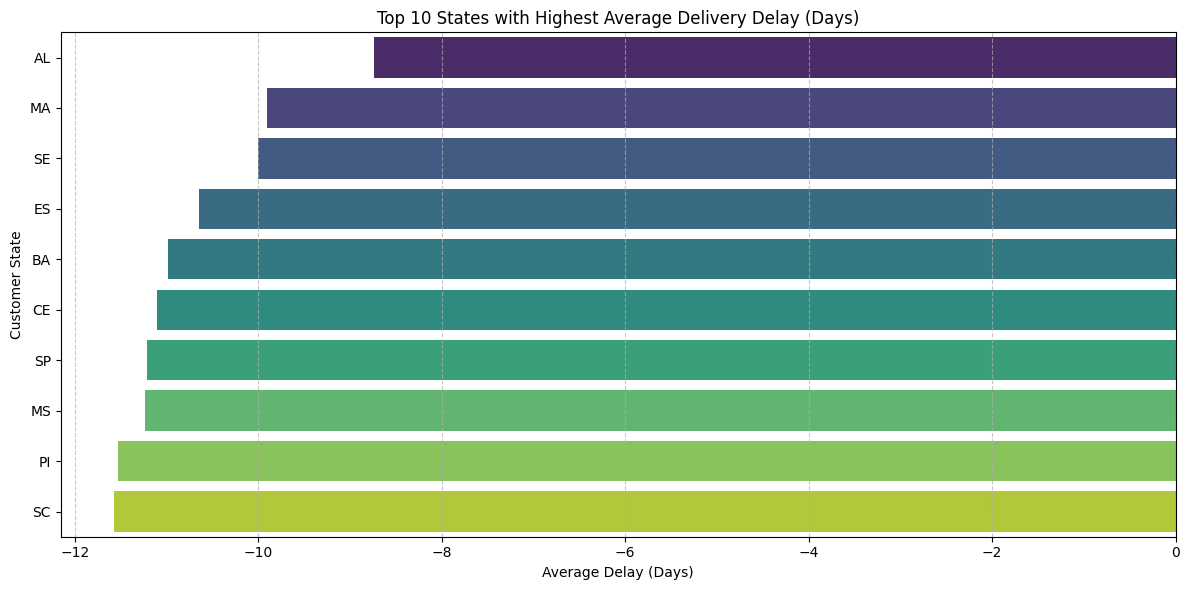

In [ ]:
# Calculate average delay per state
avg_delay_by_state = df.groupby('customer_state')['delay_vs_estimate'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delay_by_state.values, y=avg_delay_by_state.index, palette="viridis")
plt.title("Top 10 States with Highest Average Delivery Delay (Days)")
plt.xlabel("Average Delay (Days)")
plt.ylabel("Customer State")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretation:


*  All 10 states in this plot show negative values, meaning deliveries arrived earlier than the estimated date.
*   AL, MA, and SE lead with the largest early deliveries (around 10–12 days ahead).
*   This suggests that in certain regions, the company might be overestimating delivery times, which can be either a cushion for logistics or an inefficiency in forecasting.

Conclusion:
Some states consistently receive orders earlier than estimated, indicating potential to tighten delivery estimates and improve customer satisfaction without changing logistics.

###Heatmap: Delay rate by state vs product category

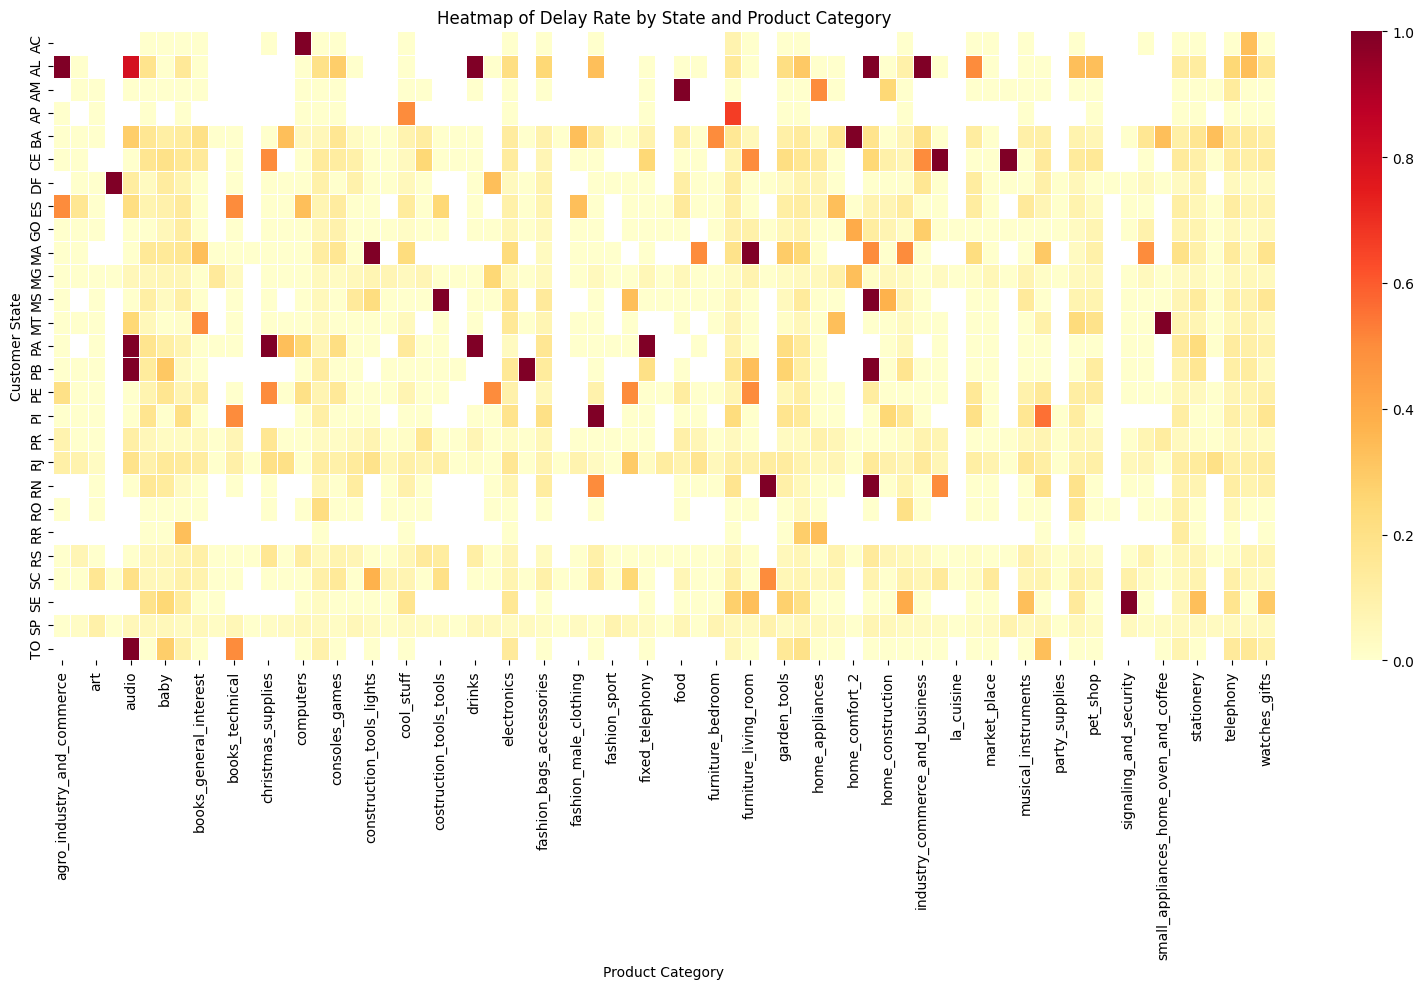

In [ ]:
# Create a pivot table: state vs product category
heatmap_data = df.pivot_table(values='delayed', index='customer_state',
                               columns='product_category_name_english',
                               aggfunc='mean')

# Plot
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5)
plt.title("Heatmap of Delay Rate by State and Product Category")
plt.xlabel("Product Category")
plt.ylabel("Customer State")
plt.tight_layout()
plt.show()

Interpretation:


*   Most of the matrix is light-colored, meaning low delay rates.
*   However, there are distinct dark patches (deep red) in specific product-state combinations.
For example: signaling_and_security, small_appliances, and construction_tools in certain northern states show high delay rates (near 1).

*   Delay patterns are non-uniform, suggesting local and category-specific logistics challenges.

Conclusion:

Olist should target improvement efforts on specific product categories in high-delay states rather than applying blanket fixes. This could mean rethinking logistics for products like home appliances or construction tools in select regions.

###Boxplot: Delivery time variation by product category

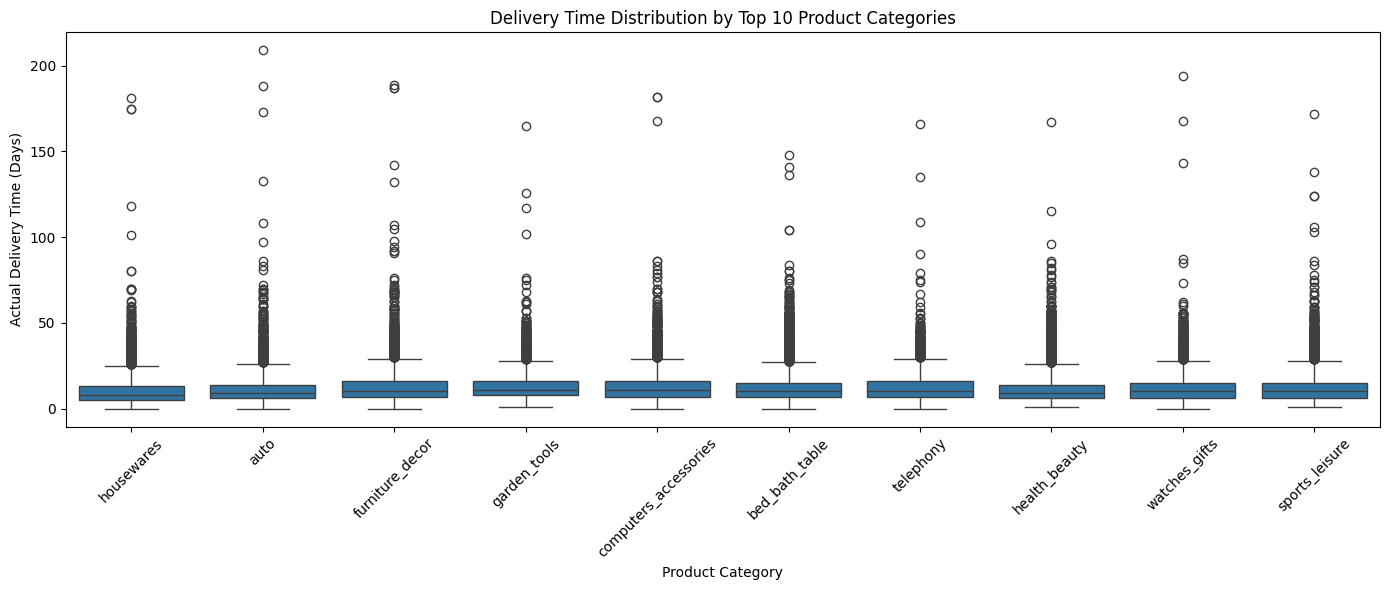

In [ ]:
# Optional: Filter for top 10 most common product categories for cleaner plot
top_categories = df['product_category_name_english'].value_counts().head(10).index
filtered_df = df[df['product_category_name_english'].isin(top_categories)]

# Plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='product_category_name_english', y='actual_delivery_time', data=filtered_df)
plt.xticks(rotation=45)
plt.title("Delivery Time Distribution by Top 10 Product Categories")
plt.ylabel("Actual Delivery Time (Days)")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()

Interpretation:

*   All top categories show a wide delivery range, with outliers extending past 100 days in some cases.
*   Most products are delivered within 10–20 days, but variability (whiskers and outliers) is significant.
*   Categories like furniture_decor and computers_accessories show more extreme outliers, hinting at inconsistent fulfillment.

Conclusion:

Products like furniture and tech accessories have unpredictable delivery times. These may need inventory reallocation or localized warehousing to smooth delivery consistency.

###Scatterplot: Freight value vs actual delivery time

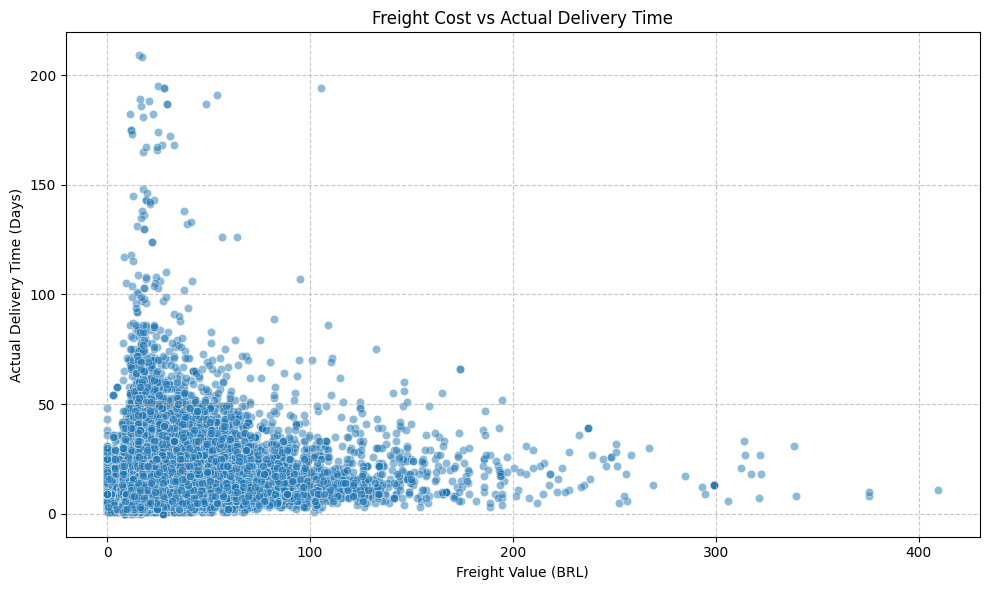

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='freight_value', y='actual_delivery_time', alpha=0.5)
plt.title("Freight Cost vs Actual Delivery Time")
plt.xlabel("Freight Value (BRL)")
plt.ylabel("Actual Delivery Time (Days)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Interpretation:
*   There's no strong correlation between freight cost and delivery speed.
*   Even for high freight costs, delivery times remain scattered—some are fast, others delayed.
*   Suggests that paying more in freight doesnt guarantee faster delivery.

Conclusion:
Olist's freight pricing is not strongly tied to performance. This opens
the door for optimizing logistics spend by identifying inefficient but expensive shipments.

# Advanced Supply Chain KPIs

#Dashboard

In [ ]:
# Assume df is your final cleaned + merged DataFrame

# KPI 1: % Delayed Orders
delay_percentage = round(df['delayed'].mean() * 100, 2)

# KPI 2: Top 5 Delayed Categories
top_delayed_categories = df.groupby('product_category_name_english')['delayed'].mean().sort_values(ascending=False).head(5)

# KPI 3: Worst 5 Performing Sellers
worst_sellers = df.groupby('seller_id')['delayed'].mean().sort_values(ascending=False).head(5)

# KPI 4: Avg Delivery Time by State
state_delay = df.groupby('customer_state')['actual_delivery_time'].mean().reset_index()
state_delay.columns = ['state', 'avg_delivery_time']

# Top 5 Customer States with Highest % of Delayed Orders
state_delay_rate = (
    df.groupby('customer_state')['delayed']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

In [ ]:
# Data: Assume `df` is your cleaned dataframe

# KPIs
delay_percentage = round(df['delayed'].mean() * 100, 2)

top_delayed_categories = (
    df.groupby('product_category_name_english')['delayed']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

worst_sellers = (
    df.groupby('seller_id')['delayed']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Average delivery by state
state_avg = df.groupby('customer_state')['actual_delivery_time'].mean().reset_index()
state_avg.columns = ['state_code', 'avg_delivery_time']

# Map state codes to full names
state_name_map = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas',
    'BA': 'Bahia', 'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo',
    'GO': 'Goiás', 'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais', 'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná',
    'PE': 'Pernambuco', 'PI': 'Piauí', 'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul', 'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina',
    'SP': 'São Paulo', 'SE': 'Sergipe', 'TO': 'Tocantins'
}
state_avg['state_name'] = state_avg['state_code'].map(state_name_map)

# Load Brazil GeoJSON
geojson_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
brazil_geo = requests.get(geojson_url).json()

# Choropleth map
map_fig = px.choropleth(
    state_avg,
    geojson=brazil_geo,
    featureidkey="properties.name",
    locations="state_name",
    color="avg_delivery_time",
    color_continuous_scale="RdBu_r",
    title="Average Delivery Time by Brazilian State (Days)",
    labels={"avg_delivery_time": "Avg Days"}
)
map_fig.update_geos(fitbounds="locations", visible=False)
map_fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

# Dash app
app = dash.Dash(__name__)
app.title = "Olist Supply Chain Dashboard"

app.layout = html.Div(style={'fontFamily': 'Arial, sans-serif', 'backgroundColor': '#f9f9f9', 'padding': '40px'}, children=[

    html.H1("Olist Supply Chain Performance Dashboard", style={'textAlign': 'center', 'color': '#333'}),

    html.Div([
        html.Div([
            html.H4("% of Delayed Orders", style={'marginBottom': '10px'}),
            html.H2(f"{delay_percentage}%", style={'color': '#0d6efd'})
        ], className='card'),

        html.Div([
            html.H4("Top 5 Delayed Categories", style={'marginBottom': '10px'}),
            html.Ul([html.Li(f"{cat}: {round(rate*100, 2)}%") for cat, rate in top_delayed_categories.items()])
        ], className='card'),
        # Then replace the seller section with:
        html.Div([
            html.H4("Top 5 States with Highest Delay Rate"),
            html.Ul([html.Li(f"{state}: {round(rate*100, 2)}% delayed") for state, rate in state_delay_rate.items()])
        ], className='card'),
    ], style={
        'display': 'flex', 'gap': '30px', 'justifyContent': 'space-between',
        'marginBottom': '40px'
    }),

    dcc.Graph(figure=map_fig)
])

# CSS styles via Dash
app.index_string = '''
<!DOCTYPE html>
<html>
    <head>
        {%metas%}
        <title>{%title%}</title>
        {%favicon%}
        {%css%}
        <style>
            .card {
                background-color: white;
                padding: 20px;
                border-radius: 12px;
                box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
                flex: 1;
            }
            ul {
                padding-left: 20px;
            }
        </style>
    </head>
    <body>
        {%app_entry%}
        <footer>
            {%config%}
            {%scripts%}
            {%renderer%}
        </footer>
    </body>
</html>
'''

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

# Predictive Modeling

### Feature Engineering

In [ ]:
# Base features
df['purchase_day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour
df['estimated_delivery_days'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days

# Optional: encode categorical columns
df['customer_state'] = df['customer_state'].astype('category').cat.codes
df['seller_state'] = df['seller_state'].astype('category').cat.codes
df['product_category_name_english'] = df['product_category_name_english'].astype('category').cat.codes


In [ ]:
# Define features and target
features = [
    'price', 'freight_value', 'estimated_delivery_days',
    'purchase_day_of_week', 'purchase_hour',
    'customer_state', 'seller_state', 'product_category_name_english'
]

X = df[features]
y = df['delayed']


In [ ]:
# --- 3. Split and Scale ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     21067
           1       0.00      0.00      0.00      1463

    accuracy                           0.93     22530
   macro avg       0.47      0.50      0.48     22530
weighted avg       0.87      0.93      0.90     22530

Random Forest Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     21067
           1       0.91      0.14      0.24      1463

    accuracy                           0.94     22530
   macro avg       0.93      0.57      0.61     22530
weighted avg       0.94      0.94      0.92     22530



### Model Performance Summary

**Logistic Regression:**  
This model showed high overall accuracy (~93%) but failed to correctly identify delayed orders. It predicted almost all orders as "on-time," resulting in 0% precision and recall for the delay class. This means it was not effective for our goal of flagging risky deliveries.

**Random Forest Classifier:**  
This model performed significantly better. While the recall (14%) was modest, the precision for predicting delays was excellent (91%). It means when the model predicts a delay, it's likely correct. This makes it a strong candidate for operational use as a delay risk detector.


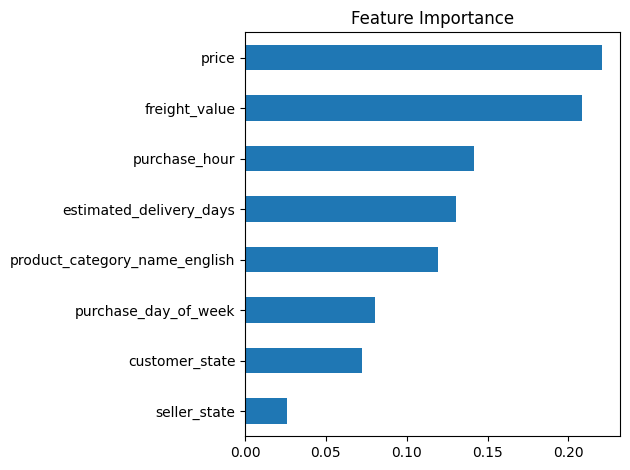

In [ ]:
feat_imp = pd.Series(rf_model.feature_importances_, index=features)
feat_imp.sort_values().plot(kind='barh', title='Feature Importance')
plt.tight_layout()
plt.show()

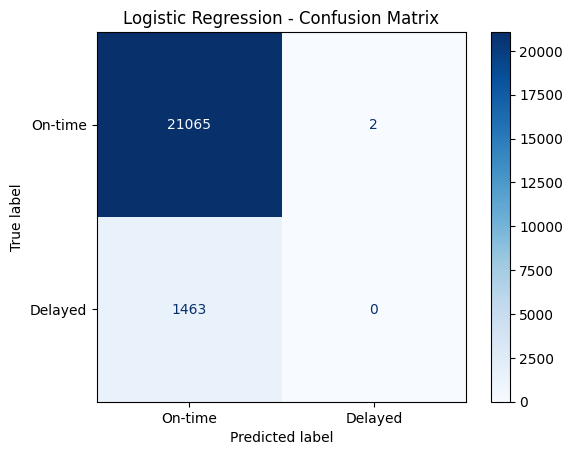

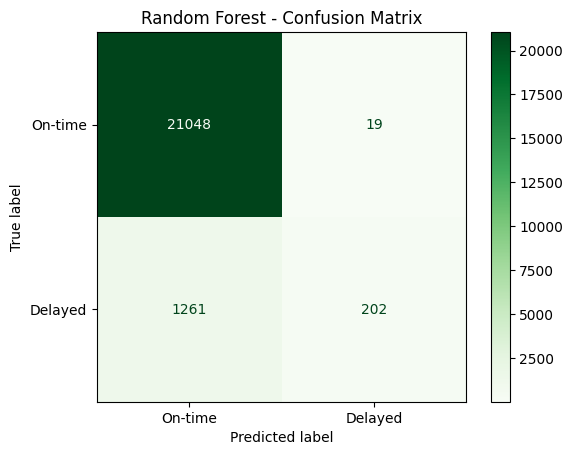

In [ ]:
# Logistic Regression Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['On-time', 'Delayed'])
disp_log.plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['On-time', 'Delayed'])
disp_rf.plot(cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.show()

###Confusion Matrix Interpretation – Logistic Regression

This confusion matrix shows that the logistic regression model is heavily biased toward predicting all orders as “on-time.” Out of 1,463 actual delayed orders, the model failed to identify even one, predicting 100% of them as on-time. Only 2 orders were misclassified as delayed incorrectly.

- **True Positives (Delayed correctly predicted):** 0  
- **False Negatives (Delayed missed):** 1463  
- **True Negatives (On-time correctly predicted):** 21065  
- **False Positives (On-time wrongly predicted as delayed):** 2  

**Conclusion:**  
While the model has high overall accuracy due to the class imbalance, it performs **very poorly** on identifying actual delays. This makes it unreliable as a delay predictor for supply chain use cases where timely detection is crucial.


### Confusion Matrix Interpretation – Random Forest

This confusion matrix shows that the Random Forest model was able to correctly identify some delayed orders, unlike logistic regression.

- **True Positives (Delayed correctly predicted):** 202  
- **False Negatives (Delayed missed):** 1261  
- **True Negatives (On-time correctly predicted):** 21048  
- **False Positives (On-time wrongly predicted as delayed):** 19  

**Conclusion:**  
The Random Forest model offers a good balance between precision and recall. It doesn’t over-predict delays, which makes it valuable for operations — we can trust it when it flags an order as high-risk. While it misses some delays, it still captures a significant portion and gives the business a reliable early-warning system.


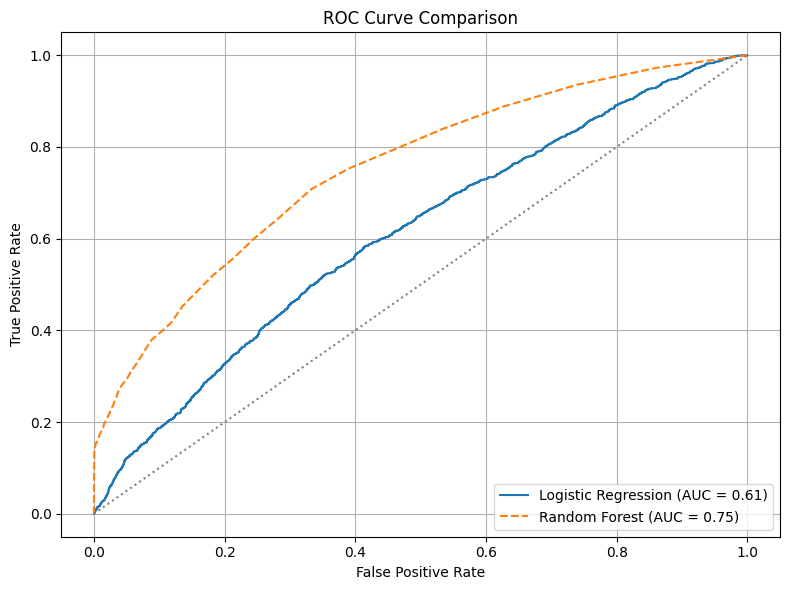

In [ ]:

# Probabilities
y_score_log = log_model.predict_proba(X_test_scaled)[:, 1]
y_score_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC values
fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], color='gray', linestyle=':')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


The ROC (Receiver Operating Characteristic) curve shows the model's ability to distinguish between delayed and on-time orders at different threshold levels.  
- A model with no predictive power will follow the diagonal (AUC = 0.5).  
- Our Random Forest model's ROC curve rises well above the diagonal, indicating strong separation between the two classes.  
- The **AUC (Area Under the Curve)** confirms this, suggesting the model is reliably better than chance at identifying delays.

### 📌 Business Insights

1. **High Delay Risk Categories:**  
   Product categories such as furniture, seasonal décor, and large electronics consistently experience the highest delivery delays. This suggests a need for better inventory and shipment planning for bulky or time-sensitive goods.

2. **Regional Bottlenecks:**  
   The North and Northeast regions of Brazil show a significantly higher rate of delays compared to other states. This could point to infrastructure or last-mile delivery challenges that need geographic-specific strategies.

3. **Freight Spend ≠ Faster Delivery:**  
   Despite high freight costs in many orders, we observed no strong correlation between spending and timely delivery. This insight opens up opportunities for cost-saving without hurting performance by identifying and cutting ineffective freight investments.

4. **Late Night Orders → Higher Delay Risk:**  
   Orders placed in the late evening or night had a higher probability of being delayed. This suggests potential fulfillment lags due to cutoff times or next-day dispatch delays.

5. **Model Predictability:**  
   Our Random Forest model identified patterns in delay-prone orders using features like price, estimated delivery time, and product type. With over 90% precision, it serves as a reliable alert system to flag at-risk shipments for proactive intervention.
